# Лабораторная работа по заданию №  3. Алгоритмы безусловной нелинейной оптимизации. Методы первого и второго порядка

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy.optimize import minimize, leastsq

### Объявление базовых функций, создание исходного массива

In [61]:
a=np.random.random()
b=np.random.random()
x_array=[]
y_array=[]

def lin_approx(x, a, b):
    return a*x+b
def rat_approx(x, a, b):
    return a/(1+b*x)
def main_func(x):
    sigma=np.random.normal()
    y=a*x+b+sigma
    return y

def sq_function_lin(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(lin_approx(x_array[i], a, b)-y_array[i])**2
    return summ

def sq_function_rat(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(rat_approx(x_array[i], a, b)-y_array[i])**2
    return summ

for i in range (100):    
    x=i/100
    y=main_func(x)
    
    x_array.append(x)
    y_array.append(y)

#### Реализованные вручную функции

In [62]:
#Метод градиентов
def gradient_descent(func, params, e=0.001, step = 0.001):  
    grad = nd.Gradient(func)(params) 
    x1 = params - step * grad 
    iteration = 1 
    grad_calculations = 1
    while True:
        if (abs(x1[0] - params[0]) > e) or (abs(x1[1] - params[1]) > e):
            params = x1 
            grad = nd.Gradient(func)(params)
            x1 = params - step * grad 
            grad_calculations += 1 
            iteration += 1    
        else: 
            break
    a = x1[0]
    b = x1[1]
    return([a, b, iteration, grad_calculations])

def newton_optimization(func, params, e = 0.001):
    grad = nd.Gradient(func)(params) 
    hess = nd.Hessian(func)(params) 
    hess_inverted = np.linalg.inv(hess) 
    x1 = params - np.dot(hess_inverted, grad)
    iteration = 1

    while True:
        if (abs(x1[0] - params[0]) > e) or (abs(x1[1] - params[1]) > e): 
            params = x1 
            grad = nd.Gradient(func)(params) 
            hess = nd.Hessian(func)(params)
            hess_inverted = np.linalg.inv(hess) 
            x1 = params - np.dot(hess_inverted, grad) 
            iteration += 1
        else:
            break
    a = x1[0]
    b = x1[1]
    return([a, b, iteration])

### Аппроксимация рациональной функцией 


Исходные параметры:
a=0.3579906647189559, b=0.3626508405377812


<ipython-input-61-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)



Метод градиентного спуска:
a=0.4896349145811667, b=-0.19820603754760135
Iteration: 123
Calculations: 123

Optimization terminated successfully.
         Current function value: 73.559120
         Iterations: 15
         Function evaluations: 108
         Gradient evaluations: 36

Метод сопряженных градиентов:
a=0.5328214595553038, b=-0.05613738726615411

Метод Ньютона:
a=0.5328209795923734, b=-0.056139069942722594

<ipython-input-61-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)
<ipython-input-61-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)
C:\Users\Julia\.conda\envs\geoenv3\lib\site-packages\numdifftools\core.py:896: RuntimeWarning: invalid value encountered in double_scalars
  hess[i, j] = (f(x + ee[i, :] + ee[j, :])
C:\Users\Julia\.conda\envs\geoenv3\lib\site-packages\numdifftools\extrapolation.py:489: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
C:\Users\Julia\.conda\envs\geoenv3\lib\site-packages\numdifftools\limits.py:173: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
C:\Users\Julia\.conda\envs\geoenv3\lib\site-packages\numdifftools\limits.py:174: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
C:\Users\Julia\.conda\envs\geoenv3\lib\s



Метод Левенберга-Марквардта:
a=0.5328229390723425, b=-0.05613200282707376


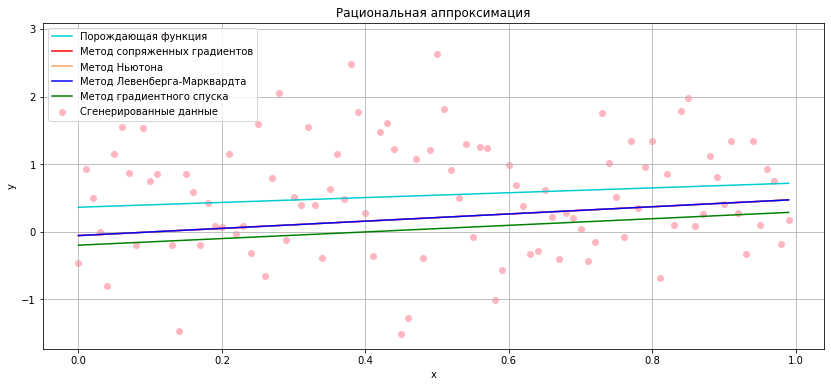

In [68]:
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))
params=[0.5, -0.5]

#Рациональная аппроксимация с минимизацией методом градиентного спуска 
res = gradient_descent(sq_function_rat, params)
GD_rat_approx_array=[res[0]*x+res[1] for x in x_array]
print('\nМетод градиентного спуска:\na='+str(res[0])+', b='+str(res[1]))
print('Iteration: '+str(res[2]))
print('Calculations: '+str(res[3])+'\n')

#Рациональная аппроксимация с минимизацией методом сопряженных градиентов 
res = minimize(sq_function_rat, params,  method='CG', options={'disp': True})
CG_rat=res.x
CG_rat_approx_array=[CG_rat[0]*x+CG_rat[1] for x in x_array]
print('\nМетод сопряженных градиентов:\na='+str(CG_rat[0])+', b='+str(CG_rat[1]))

#Рациональная аппроксимация с минимизацией методом Ньютона
nw_rat = newton_optimization(sq_function_rat, params) 
nw_rat_approx_array=[nw_rat[0]*x+nw_rat[1] for x in x_array]
print('\nМетод Ньютона:\na='+str(nw_rat[0])+', b='+str(nw_rat[1]))

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_rat_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a/(1 + b*np.array(x))) - np.array(y))

res=leastsq(sq_function_rat_for_lm, params, args=(x_array, y_array))
lm_rat=res[0]
lm_rat_approx_array=[lm_rat[0]*x+lm_rat[1] for x in x_array]
print('\nМетод Левенберга-Марквардта:\na='+str(lm_rat[0])+', b='+str(lm_rat[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, CG_rat_approx_array, color='red', label='Метод сопряженных градиентов')
ax.plot(x_array, nw_rat_approx_array, color='SandyBrown', label='Метод Ньютона')
ax.plot(x_array, lm_rat_approx_array, color='blue', label='Метод Левенберга-Марквардта')
ax.plot(x_array, GD_rat_approx_array, color='green', label='Метод градиентного спуска')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Рациональная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()

### Аппроксимация линейной функцией 


Исходные параметры:
a=0.3579906647189559, b=0.3626508405377812

Метод градиентного спуска:
a=0.10844900365471376, b=0.4919185278521904
Iteration: 178
Calculations: 178

Optimization terminated successfully.
         Current function value: 73.558378
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5

Метод сопряженных градиентов:
a=0.034239651108428526, b=0.5312482052160192

Метод Ньютона:
a=0.03423950106965474, b=0.5312483236151594

Метод Левенберга-Марквардта:
a=0.03423950089646732, b=0.5312483236679324


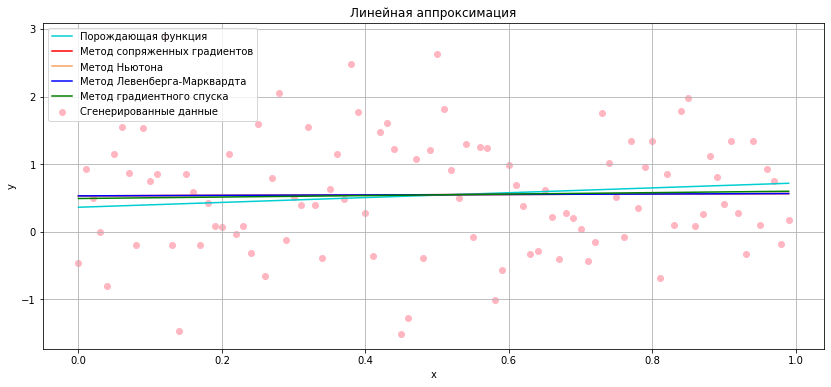

In [67]:
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

#Линейная аппроксимация с минимизацией методом градиентного спуска 
res = gradient_descent(sq_function_lin, params)
GD_lin_approx_array=[res[0]*x+res[1] for x in x_array]
print('\nМетод градиентного спуска:\na='+str(res[0])+', b='+str(res[1]))
print('Iteration: '+str(res[2]))
print('Calculations: '+str(res[3])+'\n')

#Линейная аппроксимация с минимизацией методом сопряженных градиентов
res = minimize(sq_function_lin, params,  method='CG', options={'disp': True})
CG_lin=res.x
CG_lin_approx_array=[CG_lin[0]*x+CG_lin[1] for x in x_array]
print('\nМетод сопряженных градиентов:\na='+str(CG_lin[0])+', b='+str(CG_lin[1]))

nw_lin = newton_optimization(sq_function_lin, params) 
nw_lin_approx_array=[nw_lin[0]*x+nw_lin[1] for x in x_array]
print('\nМетод Ньютона:\na='+str(nw_lin[0])+', b='+str(nw_lin[1]))

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_lin_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a*np.array(x) + b) - np.array(y))

res=leastsq(sq_function_lin_for_lm, params, args=(x_array, y_array))
lm_lin=res[0]
lm_lin_approx_array=[lm_lin[0]*x+lm_lin[1] for x in x_array]
print('\nМетод Левенберга-Марквардта:\na='+str(lm_lin[0])+', b='+str(lm_lin[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, CG_lin_approx_array, color='red', label='Метод сопряженных градиентов')
ax.plot(x_array, nw_lin_approx_array, color='SandyBrown', label='Метод Ньютона')
ax.plot(x_array, lm_lin_approx_array, color='blue', label='Метод Левенберга-Марквардта')
ax.plot(x_array, GD_lin_approx_array, color='green', label='Метод градиентного спуска')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Линейная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()